In [14]:
#Q1.   in the report.pdf


In [15]:
import numpy as np
import librosa as lib
import librosa.display
import matplotlib.pyplot as plt

# Q2

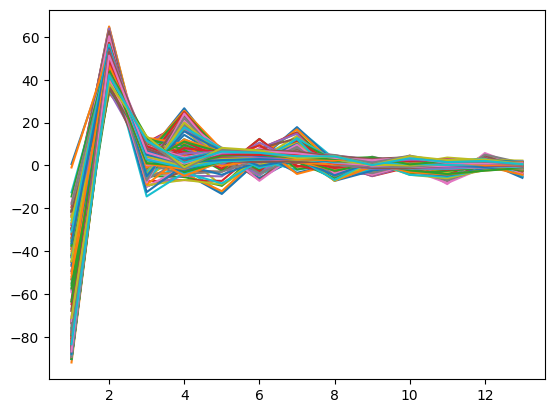

In [16]:

info,samp_freq=lib.load('wav/recording.wav')

# lib.display.waveplot(info, samp_freq)
plt.show()
mfcc = lib.feature.mfcc(y=info, sr=samp_freq,n_mels=13)  
plt.plot(np.arange(1, len(mfcc)+1),mfcc) 
plt.show()



##
 As can be seen, most of the MFCC coefficients have positive values, while one or two have negative values.
- This indicates that the speech is mostly composed of low frequency values and  contains a considerable quantity of spoken speech.
The presence of a lot of unvoiced or noise material in speech would be indicated by negative numbers, which would imply high frequency.
- When a cepstral coefficient is positive, the spectral energy is mostly concentrated in the low-frequency regions. A negative cepstral coefficient, on the other hand, indicates that the majority of the spectral energy is concentrated at high frequencies.

## Q3

In [17]:
# manually found 0.1 to 0.3 second is a voiced region from the waveform.
#sampling frequency is 22050 Hz
audio,samp_freq=lib.load('wav/q3_audio.wav')
start=2205
frame_length=512
end=start+512
hamming_window=np.hamming(frame_length)
voiced_frame=audio[start:end]
voiced_frame=voiced_frame*hamming_window

time = np.linspace(0, len(voiced_frame) / samp_freq, len(voiced_frame))  



#ploting the voice spectrum

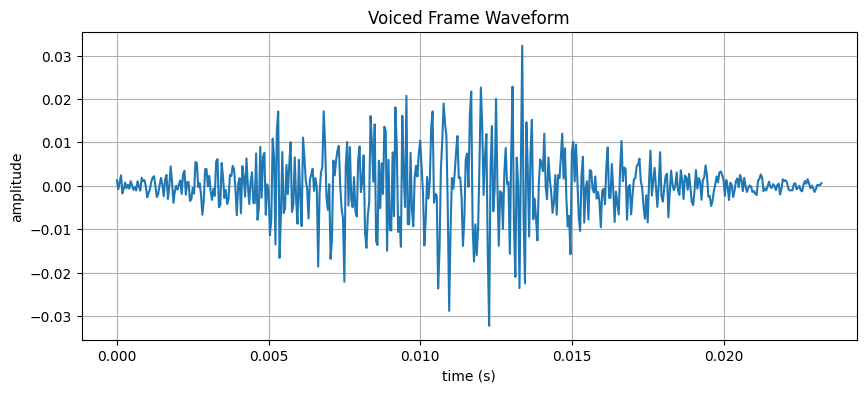

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(time, voiced_frame)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.title('Voiced Frame Waveform')
plt.grid(True)
plt.show()

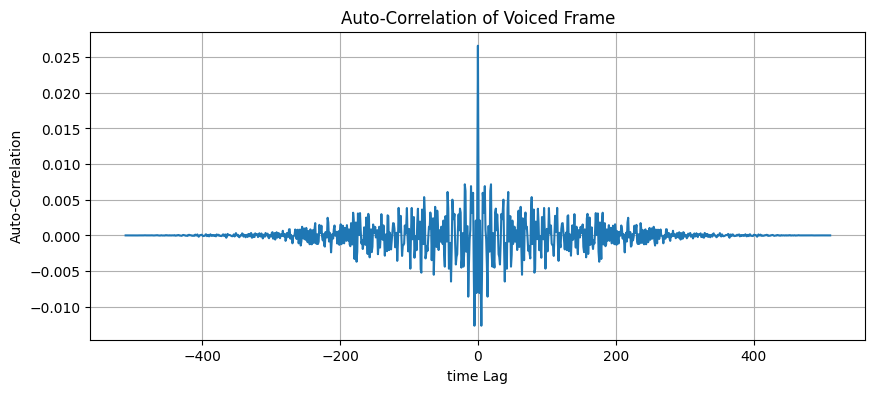

In [19]:
# Autocorrelation

autocorrelation=np.correlate(voiced_frame,voiced_frame,mode='full')
lags = np.arange(-len(voiced_frame) + 1, len(voiced_frame))

# Plot 
plt.figure(figsize=(10, 4))
plt.plot(lags, autocorrelation)
plt.xlabel('time Lag')
plt.ylabel('Auto-Correlation')
plt.title('Auto-Correlation of Voiced Frame')
plt.grid(True)
plt.show()

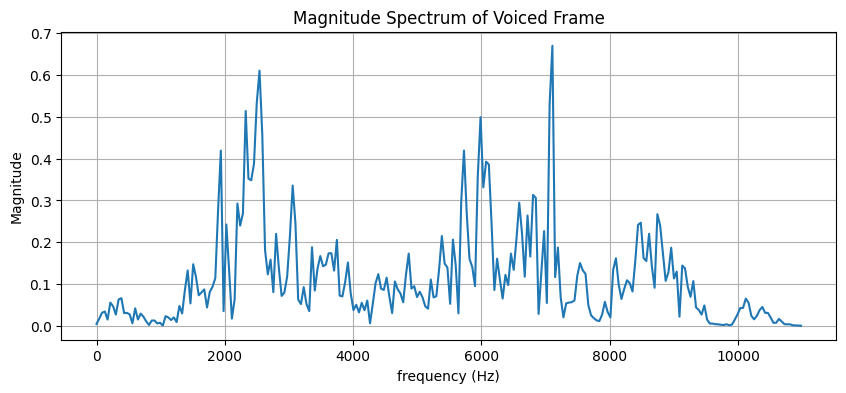

In [20]:
#  magnitude spectrum 
magnitude_spectrum = np.abs(np.fft.fft(voiced_frame))

freq = np.fft.fftfreq(len(voiced_frame), d=1/samp_freq)
plt.figure(figsize=(10, 4))
plt.plot(freq[:len(voiced_frame)//2], magnitude_spectrum[:len(voiced_frame)//2]) 
plt.xlabel('frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Voiced Frame')
plt.grid(True)
plt.show()

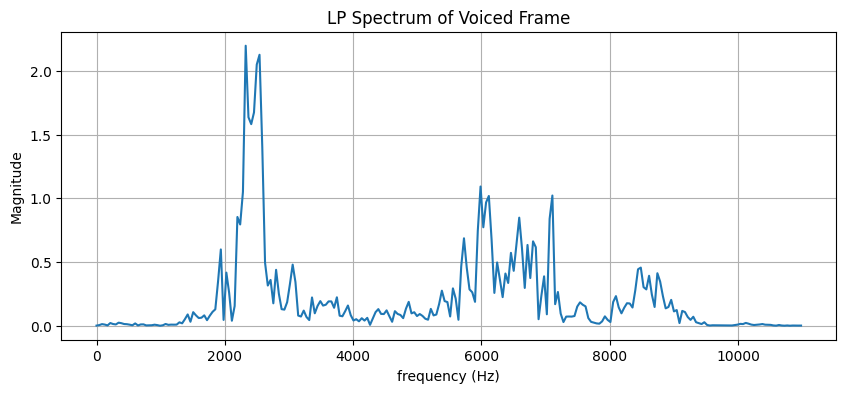

In [21]:

from scipy.signal import lfilter
order=8
lp_coeffs = librosa.lpc(voiced_frame, order=order)


lp_spectrum = np.abs(np.fft.fft(lfilter([1], lp_coeffs, voiced_frame)))

# Plot 
plt.figure(figsize=(10, 4))
plt.plot(freq[:len(voiced_frame)//2], lp_spectrum[:len(voiced_frame)//2])  
plt.xlabel('frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('LP Spectrum of Voiced Frame')
plt.grid(True)
plt.show()








In [22]:
# pitch estimation
#by autocorrelation
first_peak=np.argmax(autocorrelation[1:])+1
freq_auto=samp_freq/first_peak


#by magnitude spectrum
freq2=np.argmax(magnitude_spectrum)
freq_mag_spectrum=samp_freq*freq2
freq_mag_spectrum/=len(voiced_frame)


#by lp spectrum
freq3=np.argmax(lp_spectrum)
freq_lp_spectrum=samp_freq*freq3
freq_lp_spectrum/=len(voiced_frame)
print ("pitch estimation")
print(f"by autocorrelation: {freq_auto} Hz")
print(f"by magnitude spectrum: {freq_mag_spectrum} Hz")
print(f"by LP spectrum: {freq_lp_spectrum} Hz")


pitch estimation
by autocorrelation: 43.15068493150685 Hz
by magnitude spectrum: 14944.04296875 Hz
by LP spectrum: 2325.5859375 Hz


In [23]:

# Best pitch estimation method is the first one that is by autocorrelation.
# because the typically human speech veries between 50 to 300Hz .
# so by other two pitch estimation method gives very high pitch which is not the case for human speech.
 
# this can be due to the order of lp analysis and hence the pitch estimatio using autocorrelation seems the most suitable one .